In [9]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [10]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import pickle
import sounddevice
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
import keras
from keras.models import Sequential, Model, model_from_json
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [7]:
fs= 44100
second =  int(input("Enter time duration in seconds: "))
print("Recording")
record_voice = sounddevice.rec( int ( second * fs ) , samplerate = fs , channels = 2 )
sounddevice.wait()
write("File01.wav",fs,record_voice)
print("Saved File")


Recording
Saved File


In [14]:
json_file = open('C:\\Users\\goyal\\Downloads\\Face_Emotion_Recognition_Machine_Learning-main (1)\\Face_Emotion_Recognition_Machine_Learning-main\\model_json.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("C:\\Users\\goyal\\Downloads\\Face_Emotion_Recognition_Machine_Learning-main (1)\\Face_Emotion_Recognition_Machine_Learning-main\\Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.Adam(lr=0.0001)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
newData,newSR= librosa.load("File01.wav")
ipd.Audio("File01.wav")

Loaded model from disk


In [15]:
TRAIN_DIR = 'C:\\Users\\goyal\\Downloads\\archive (2)\\images\\train'
TEST_DIR = 'C:\\Users\\goyal\\Downloads\\archive (2)\\images\\test'

In [16]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [17]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [21]:
print(train)

                                                   image     label
0      C:\Users\goyal\Downloads\archive (2)\images\tr...     angry
1      C:\Users\goyal\Downloads\archive (2)\images\tr...     angry
2      C:\Users\goyal\Downloads\archive (2)\images\tr...     angry
3      C:\Users\goyal\Downloads\archive (2)\images\tr...     angry
4      C:\Users\goyal\Downloads\archive (2)\images\tr...     angry
...                                                  ...       ...
28816  C:\Users\goyal\Downloads\archive (2)\images\tr...  surprise
28817  C:\Users\goyal\Downloads\archive (2)\images\tr...  surprise
28818  C:\Users\goyal\Downloads\archive (2)\images\tr...  surprise
28819  C:\Users\goyal\Downloads\archive (2)\images\tr...  surprise
28820  C:\Users\goyal\Downloads\archive (2)\images\tr...  surprise

[28821 rows x 2 columns]


In [22]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [23]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\goyal\Downloads\archive (2)\images\te...     angry
1     C:\Users\goyal\Downloads\archive (2)\images\te...     angry
2     C:\Users\goyal\Downloads\archive (2)\images\te...     angry
3     C:\Users\goyal\Downloads\archive (2)\images\te...     angry
4     C:\Users\goyal\Downloads\archive (2)\images\te...     angry
...                                                 ...       ...
7061  C:\Users\goyal\Downloads\archive (2)\images\te...  surprise
7062  C:\Users\goyal\Downloads\archive (2)\images\te...  surprise
7063  C:\Users\goyal\Downloads\archive (2)\images\te...  surprise
7064  C:\Users\goyal\Downloads\archive (2)\images\te...  surprise
7065  C:\Users\goyal\Downloads\archive (2)\images\te...  surprise

[7066 rows x 2 columns]
0       C:\Users\goyal\Downloads\archive (2)\images\te...
1       C:\Users\goyal\Downloads\archive (2)\images\te...
2       C:\Users\goyal\Downloads\archive (2)\images\te...
3       C

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [ ]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [18]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [19]:
x_train = train_features/255.0
x_test = test_features/255.0

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [24]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

NameError: name 'model' is not defined

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

NameError: name 'model' is not defined

In [18]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

NameError: name 'model' is not defined

In [35]:
from keras.models import model_from_json

In [36]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [30]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [95]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

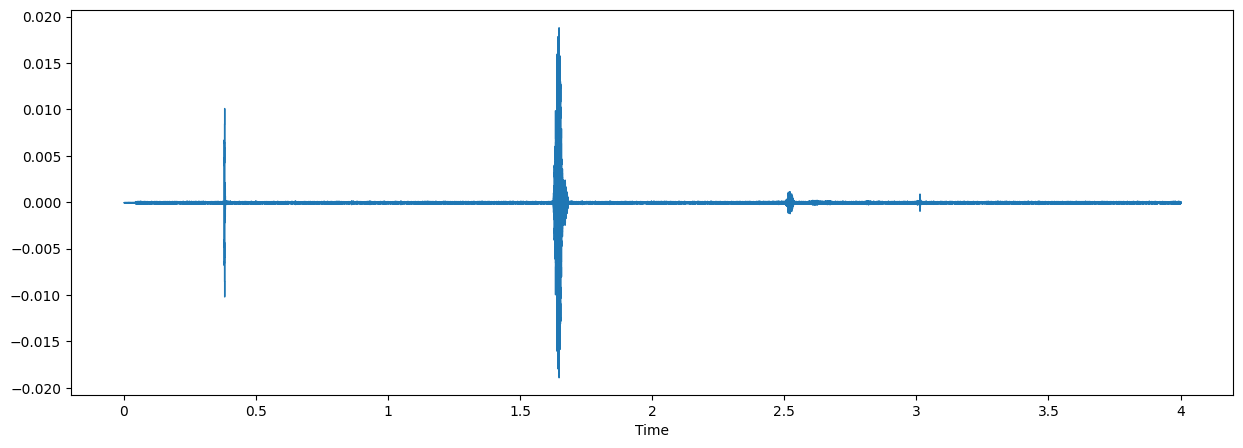

In [107]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(newData, sr=newSR)

In [108]:
newData, newSR = librosa.load("File01.wav"
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5)

newSR = np.array(newSR)
mfccs = np.mean(librosa.feature.mfcc(y=newData, sr=newSR, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0          1          2          3          4          5        6    \
0 -70.446327 -71.370659 -70.132027 -68.870308 -69.211174 -68.326241 -68.8638   

         7          8          9    ...        206        207        208  \
0 -70.406509 -69.980423 -69.783173  ... -69.947174 -68.444199 -68.223755   

         209        210        211        212        213        214        215  
0 -71.661682 -72.637978 -69.147316 -69.148888 -71.445084 -69.892212 -70.806633  

[1 rows x 216 columns]

In [109]:
newdf= np.expand_dims(newdf,axis=2)
print(newdf.shape)
newpred=loaded_model.predict(newdf)

(1, 216, 1)
1/1 [==============================] - 0s 235ms/step


In [110]:
filename = filename = 'C:\\Users\\goyal\\Downloads\\Face_Emotion_Recognition_Machine_Learning-main (1)\\Face_Emotion_Recognition_Machine_Learning-main\\labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))

original image is of happy
1/1 [==============================] - 0s 34ms/step
model prediction for face is  happy
model prediction for voice is  neutral
model prediction for voice is  neutral


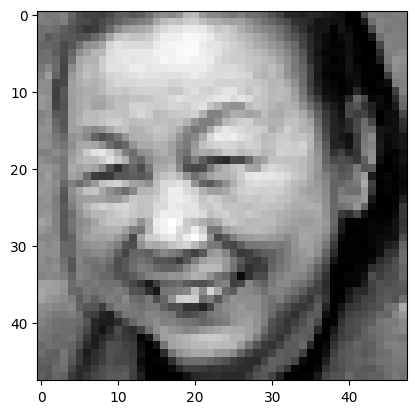

In [112]:
image = 'C:\\Users\\goyal\\Downloads\\archive (2)\\images\\train\\happy\\99.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction for face is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
print("model prediction for voice is ",final)
if final == "female_surprise":
    final = "surprise"
elif final == "female_happy":
    final = "happy"
elif final == "female_neutral":
    final = "neutral"
elif final == "female_sad":
    final = "sad"
elif final == "female_angry":
    final = "angry"
elif final == "female_fear":
    final = "fear"
elif final == "female_disgust":
    final = "disgust"
elif final == "male_surprise":
    final = "surprise"
elif final == "male_happy":
    final = "happy"
elif final == "male_neutral":
    final = "neutral"
elif final == "male_sad":
    final = "sad"
elif final == "male_angry":
    final = "angry"
elif final == "male_fear":
    final = "fear"
elif final == "male_disgust":
    final = "disgust"
print("model prediction for voice is ",final)